# Eliptic PDEs

## Laplace equation

Let us start by discretizing the stationary heat equation in a rectangular plated with dimension as given in [Figure](#fig:73):

<!-- Equation labels as ordinary links -->
<div id="eq:7201"></div>

$$
\begin{equation}
  \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial
    y^2}=0
\label{eq:7201} \tag{1}
\end{equation}
$$

<!-- dom:FIGURE:[fig/4.png, width=400 frac=0.6] Rectangular domain with prescribed values at the boundaries (Dirichlet). <div id="fig:73"></div> -->
<!-- begin figure -->
<div id="fig:73"></div>

<p>Rectangular domain with prescribed values at the boundaries (Dirichlet).</p>
<img src="fig/4.png" width=400>

<!-- end figure -->



We adopt the following notation:

$$
x_i=x_0+i\cdot h,\ i=0,1,2,\dots
$$

$$
y_j=y_0+j\cdot h,\ j=0,1,2,\dots
$$

<!-- dom:FIGURE:[fig/3_new_transparent.png, width=400 frac=0.6] Illustration of the numerical stencil. <div id="fig:ch7-3"></div> -->
<!-- begin figure -->
<div id="fig:ch7-3"></div>

<p>Illustration of the numerical stencil.</p>
<img src="fig/3_new_transparent.png" width=400>

<!-- end figure -->


For convenience we assume $\Delta x = \Delta y = h$. The ordering of
the unkown temperatures is illsustrated in .


By approximation the second order differentials in [(1)](#eq:7201) by central differences we get the following numerical stencil:

<!-- Equation labels as ordinary links -->
<div id="eq:7202"></div>

$$
\begin{equation}
  T_{i+1,j}+T_{i-1,j}+T_{i,j+1}+T_{i,j-1}-4 T_{i,j}=0
\label{eq:7202} \tag{2}
\end{equation}
$$

which states that the temperature $T_{i,j}$ in at the location $(i,j)$ depends on the values of its neighbors to the left, right, up and down. Frequently, the neighbors are denoted in compass notation, i.e. $\text{west}=i-1$, $\text{east}=i+1$, $\text{south}=j-1$, and $\text{north}=j+1$. By referring to the compass directions with their first letters, and equivalent representation of the stencil in [(2)](#eq:7202) reads:

<!-- Equation labels as ordinary links -->
<div id="eq:compass"></div>

$$
\begin{equation}
  T_{e}+T_{w}+T_{n}+T_{s}-4 T_{m}=0
\label{eq:compass} \tag{3}
\end{equation}
$$

<!-- dom:FIGURE:[fig/3_compass_sanseriff.png, width=400 frac=0.6] Illustration of the numerical stencil with compass notation. <div id="fig:ch7-3_compass"></div> -->
<!-- begin figure -->
<div id="fig:ch7-3_compass"></div>

<p>Illustration of the numerical stencil with compass notation.</p>
<img src="fig/3_compass_sanseriff.png" width=400>

<!-- end figure -->


The smoothing nature of elliptic problems may be seen even more clearly by isolating the $T_{i,j}$ in [(3)](#eq:compass) on the left hand side:

<!-- Equation labels as ordinary links -->
<div id="eq:avearge"></div>

$$
\begin{equation}
T_{m}= \frac{T_{e}+T_{w}+T_{n}+T_{s}}{4}
\label{eq:avearge} \tag{4}
\end{equation}
$$

showing that the temperature $T_{m}$ in each point is the average temperature
of the neighbors (to the east, west, north, and south).


The temperature is prescribed at the bondaries (i.e. Dirichlet
boundary conditions) and are given by:

$$
T=0.0 \quad \textrm{at} \quad  y=0 \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="eq:BCs"></div>

$$
\begin{equation} 
  T=0.0 \quad \textrm{at} \quad  x=0  \quad \textrm{ and }\quad  x=1 \quad  \textrm{ for } \quad 0 \leq y < 1.5 \label{eq:BCs} \tag{5}
\end{equation}
$$

$$
T=100.0 \quad \textrm{at} \quad y=1.5 \nonumber
$$

In [1]:
import sympy as sp
sp.init_printing()

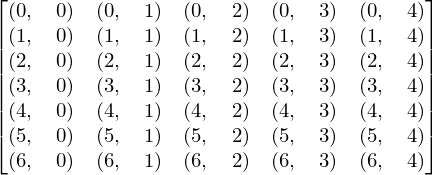

In [2]:
def index(i, j):
    return (i, j)

nx = 3
ny = 5 
sp.Matrix(ny + 2, nx + 2, index)

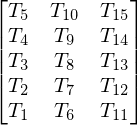

In [3]:
def T_interior_vector(i, j):
    n = j*ny + (ny-i)
    expr = 'T' + str(n)
    expr = sp.symbols(expr)
    return expr
    
T_vertical = sp.Matrix(ny, nx, T_interior_vector)
T_vertical

<!-- dom:FIGURE:[fig/4.png, width=400 frac=0.6] Rectangular domain with prescribed values at the boundaries (Dirichlet). <div id="fig:73b"></div> -->
<!-- begin figure -->
<div id="fig:73b"></div>

<p>Rectangular domain with prescribed values at the boundaries (Dirichlet).</p>
<img src="fig/4.png" width=400>

<!-- end figure -->

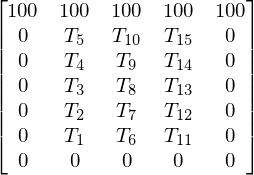

In [4]:
def T_grid(i, j):
    if i == 0:
        T_value = 100
    elif i == ny + 1:
        T_value = 0
    elif j == 0:
        T_value = 0
    elif j == nx + 1:
        T_value = 0
    else:
        n = (j-1)*ny + (ny - i + 1)
        expr = 'T' + str(n)
        T_value = sp.symbols(expr)
    return T_value
    
    
def T_string(i, j):
    expr = 'T' + str(i + 1)
    expr = sp.symbols(expr)
    return expr


T = sp.Matrix(ny + 2, nx + 2, T_grid)
T

In [5]:
def differenceEqs(n):
    j = (n-1)/ny + 1# integer division
    n = n -(j-1)*ny
    
    i = ny - n + 1
    diffeq = T[i-1,j] + T[i+1,j] + T[i,j-1] + T[i,j+1] - 4*T[i,j]
    print "i={0}, j={1}".format(i, j)
    return diffeq
    
differenceEqs(1)

i=5, j=1


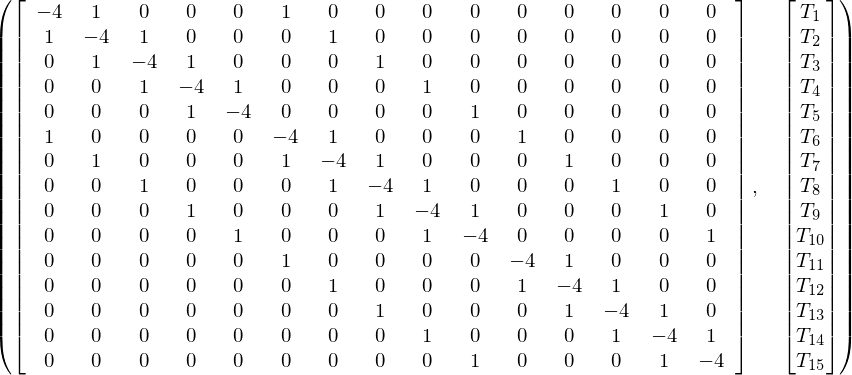

In [6]:
import numpy as np
import scipy 
import scipy.sparse
import scipy.sparse.linalg

N = nx*ny
mainD = -4*np.ones(N) # main diagonal

d = np.zeros(N) # RHS
d[ny-1::ny] = -100 # every ny element on RHS is -100
superD = np.ones(N - 1)
subD = np.ones(N - 1)

superD[ny-1::ny] = 0 # every ny element on first diagonal is zero
subD[ny-1::ny] = 0

superD5 = np.ones(N - 5)
subD5 = np.ones(N - 5)

A = scipy.sparse.diags([subD5, subD, mainD, superD, superD5], [-5, -1, 0, 1, 5], format='csc', dtype=int)
sp.Matrix(A.toarray()), sp.Matrix(N, 1, T_string)

In [7]:
%matplotlib inline

T_interior = scipy.sparse.linalg.spsolve(A, d)


x = np.linspace(0, 1, 5)
y = np.linspace(0, 1.5, 7)

X, Y = np.meshgrid(x, y)

T = np.zeros_like(X)

T[-1,:] = 100

for n in range(1,6):
    T[n,1] = T_interior[n-1]
    T[n,2] = T_interior[n+5-1]
    T[n,3] = T_interior[n+10-1]
    
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

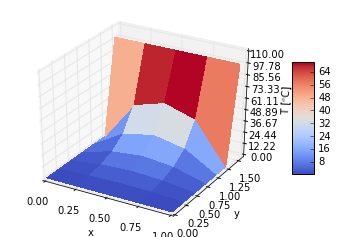

In [8]:

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()


ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, T, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 110)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('T [$^o$C]')
ax.set_xticks(x)
ax.set_yticks(y)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()